# 4. Rispondere alle domande
Trasforma le seguenti richiesti in formule per estrarre infromazioni dal dataframe
- Mostrami le vendite maggiori di 10

- Mostrami i dati del 2018

- Mostrami le vendite maggiori di 13 e l'anno è il 2018

- Mostrami tutto TRANNE i casi in cui le vendite sono maggiori di 13 e l'anno è il 2018

- Mostrami i dati dove le vendite divise per 3 sono maggiori di 3

- Mostrami i dipendenti i cui nomi sono alfabeticamente dopo la J



In [ ]:
sales = pd.DataFrame(
    data={
        "employee": [
            "Katrina",
            "Guanyu",
            "Jan",
            "Roman",
            "Jacqueline",
            "Paola",
            "Esperanza",
            "Alaina",
            "Egweyn",
        ],
        "sales": [14, 17, 6, 12, 8, 3, 7, 15, 5],
        "year": [2018, 2019, 2020, 2018, 2020, 2019, 2019, 2020, 2020],
    }
)

#1)
sales.query("sales>10")
#2)
sales.query("year==2018")
#3)
sales.query("year==2018 & sales>13")
#4)
sales.query("not (year==2018 & sales>13)")
#5)
sales.query("(sales/3)>3")
#6)
sales.query("employee>'J'") #attenzione che se nel dataframe avessi sia maiuscole che minuscole dovrei convertire tutto ad una delle due

,employee,sales,year
0,Katrina,14,2018
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019


# 5. Analisi di un dataset di video giochi
1. Quanti videogiochi sono stati pubblicati
2. Quali sono i generi più popolari? Mostralo con un bar plot
3. Plotta l'evoluzione del numero di giochi pubblicati nel tempo
4. Prova a riprodurre questo plot 
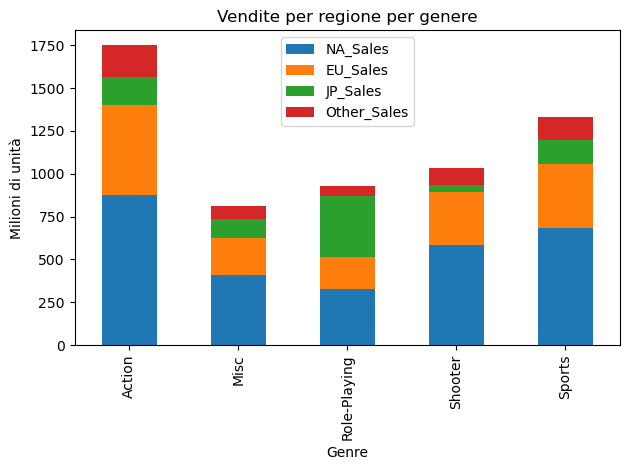


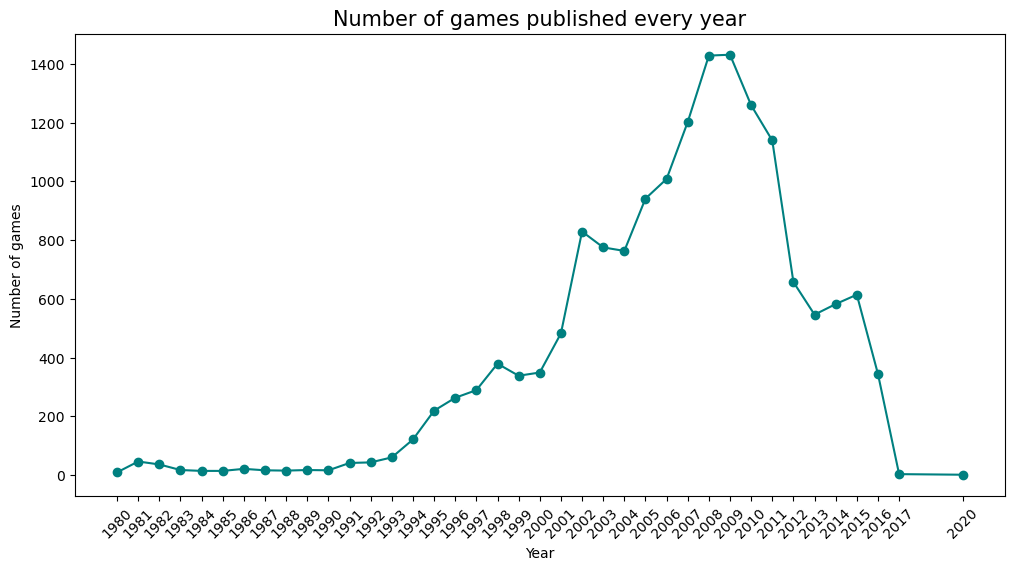

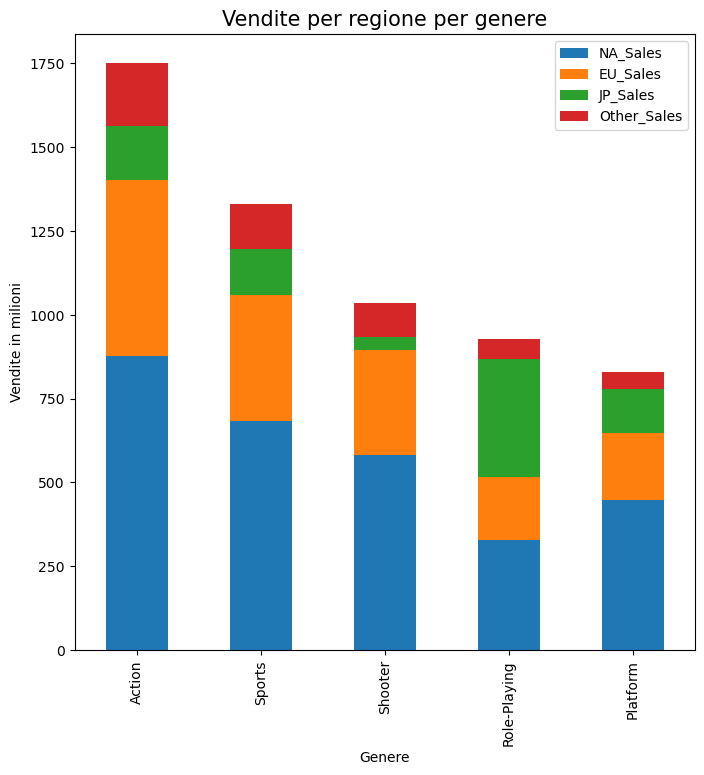

In [49]:
# Import dei pacchetti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento del dataset
url = 'https://zenodo.org/record/5898311/files/vgsales.csv'
df = pd.read_csv(url)
df.head()

#1)
num_published = df["Name"].shape[0] - df["Name"].duplicated().sum()
num_published

#2) #il 4 è come il 2 solo che l sommi regione per regione e ricorda sdi mettere stacked=True
popular = df.groupby("Genre")["Global_Sales"].sum()
# plt.figure(figsize=(12,10))
# sns.boxplot(y='Genre', x='Global_Sales', data=df)
# plt.title('Most popular games')
# plt.xlabel('Global_Sales')
# plt.ylabel('Genre')
#plt.show()

#3)
pub_per_year = df.groupby("Year").size().reset_index(name="Num_of_Games")
plt.figure(figsize=(12, 6))
plt.plot(pub_per_year['Year'], pub_per_year['Num_of_Games'], marker='o', linestyle='-', color='teal')
plt.title('Number of games published every year', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Number of games')
plt.xticks(pub_per_year['Year'], rotation=45)
plt.show()

#4)
sales_per_genre = df.groupby("Genre")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]].sum()
most_pop_genre = sales_per_genre.sort_values(by="Global_Sales", ascending=False).drop("Global_Sales",axis=1).head()

fig, ax = plt.subplots(figsize = (8, 8))
most_pop_genre.plot.bar(stacked = True, ax = ax)
plt.title('Vendite per regione per genere', fontsize=15)
plt.xlabel('Genere')
plt.ylabel('Vendite in milioni')
plt.show()
